Claude:
**bold text**
I've created a Python script that generates a dataset of 256 8x8 pixel grayscale images with smooth random gradients and occasional ellipses. Here's how it works:

The script creates random smooth gradients by interpolating between four random corner values
It quantizes the gradients to 8 grayscale levels (as requested)
For approximately 50% of the images, it adds 1-3 ellipses with uniform fill and defined contours
Each image is saved as a JPG file in a "pixel_art_dataset" directory

To run this script, you'll need:

Python installed
The following libraries: numpy, PIL (Pillow), tqdm
You can install these with: pip install numpy pillow tqdm

Simply execute the script, and it will generate all 256 images with a progress bar. The images will be saved as "pixel_art_000.jpg" through "pixel_art_255.jpg".
Would you like me to explain any part of the code in more detail or make any modifications to the implementation?

In [1]:
import numpy as np
from PIL import Image, ImageDraw
import os
from tqdm import tqdm
import random

# Define constants
IMAGE_SIZE = 8  # 8x8 pixels
NUM_IMAGES = 256  # Number of images to generate
OUTPUT_DIR = "pixel_art_dataset"  # Output directory
GRAYSCALE_LEVELS = 8  # Number of grayscale levels

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

def create_smooth_gradient_background(size):
    """Create a smooth random gradient background."""
    # Generate four corner values
    corners = np.random.randint(0, GRAYSCALE_LEVELS, size=4) * (255 // (GRAYSCALE_LEVELS - 1))

    # Create x and y grids
    y, x = np.mgrid[0:size, 0:size]
    y = y / (size - 1)
    x = x / (size - 1)

    # Bilinear interpolation
    top = corners[0] * (1 - x) + corners[1] * x
    bottom = corners[2] * (1 - x) + corners[3] * x
    gradient = top * (1 - y) + bottom * y

    # Quantize to specified grayscale levels
    gradient = np.round(gradient / (255 // (GRAYSCALE_LEVELS - 1))) * (255 // (GRAYSCALE_LEVELS - 1))

    return gradient.astype(np.uint8)

def add_ellipse(img_array, size):
    """Add an ellipse with defined contours and uniform fill."""
    # Create a temporary array for the ellipse
    ellipse_array = np.zeros((size, size), dtype=np.uint8)

    # Create a PIL image to draw on
    temp_img = Image.fromarray(ellipse_array, 'L')
    draw = ImageDraw.Draw(temp_img)

    # Randomly determine ellipse properties
    width = random.randint(2, size-1)
    height = random.randint(2, size-1)
    x0 = random.randint(0, size - width)
    y0 = random.randint(0, size - height)
    x1 = x0 + width
    y1 = y0 + height

    # Choose a random grayscale level for the fill
    fill_value = random.randint(0, GRAYSCALE_LEVELS-1) * (255 // (GRAYSCALE_LEVELS - 1))

    # Draw ellipse
    draw.ellipse([x0, y0, x1, y1], fill=fill_value)

    # Convert back to array
    ellipse_array = np.array(temp_img)

    # Create a mask where ellipse exists
    mask = ellipse_array > 0

    # Apply the ellipse to the original image
    img_array[mask] = ellipse_array[mask]

    return img_array

def generate_pixel_art():
    """Generate 8x8 pixel art images with gradients and occasional ellipses."""
    for i in tqdm(range(NUM_IMAGES)):
        # Create a smooth gradient background
        img_array = create_smooth_gradient_background(IMAGE_SIZE)

        # Decide if we should add ellipses (50% chance)
        if random.random() < 0.5:
            # Add 1-3 ellipses
            num_ellipses = random.randint(1, 3)
            for _ in range(num_ellipses):
                img_array = add_ellipse(img_array, IMAGE_SIZE)

        # Create PIL image from array
        img = Image.fromarray(img_array, 'L')

        # Save as jpg
        img.save(os.path.join(OUTPUT_DIR, f"pixel_art_{i:03d}.jpg"), quality=100)

if __name__ == "__main__":
    print(f"Generating {NUM_IMAGES} pixel art images...")
    generate_pixel_art()
    print(f"Done! Images saved to {OUTPUT_DIR}/")


Generating 256 pixel art images...


100%|██████████| 256/256 [00:00<00:00, 4367.54it/s]

Done! Images saved to pixel_art_dataset/


In [ ]:
!zip -r /content/pixel_art_dataset.zip .  /content/pixel_art_dataset

  adding: .config/ (stored 0%)
  adding: .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
  adding: .config/default_configs.db (deflated 98%)
  adding: .config/.last_survey_prompt.yaml (stored 0%)
  adding: .config/gce (stored 0%)
  adding: .config/configurations/ (stored 0%)
  adding: .config/configurations/config_default (deflated 15%)
  adding: .config/.last_update_check.json (deflated 22%)
  adding: .config/active_config (stored 0%)
  adding: .config/config_sentinel (stored 0%)
  adding: .config/logs/ (stored 0%)
  adding: .config/logs/2025.02.26/ (stored 0%)
  adding: .config/logs/2025.02.26/18.26.47.024567.log (deflated 58%)
  adding: .config/logs/2025.02.26/18.26.56.084580.log (deflated 58%)
  adding: .config/logs/2025.02.26/18.27.04.448753.log (deflated 58%)
  adding: .config/logs/2025.02.26/18.26.54.933299.log (deflated 87%)
  adding: .config/logs/2025.02.26/18.27.05.090076.log (deflated 56%)
  adding: .config/logs/2025.02.26/18.26.26.52051

Displaying grid of 16 images...


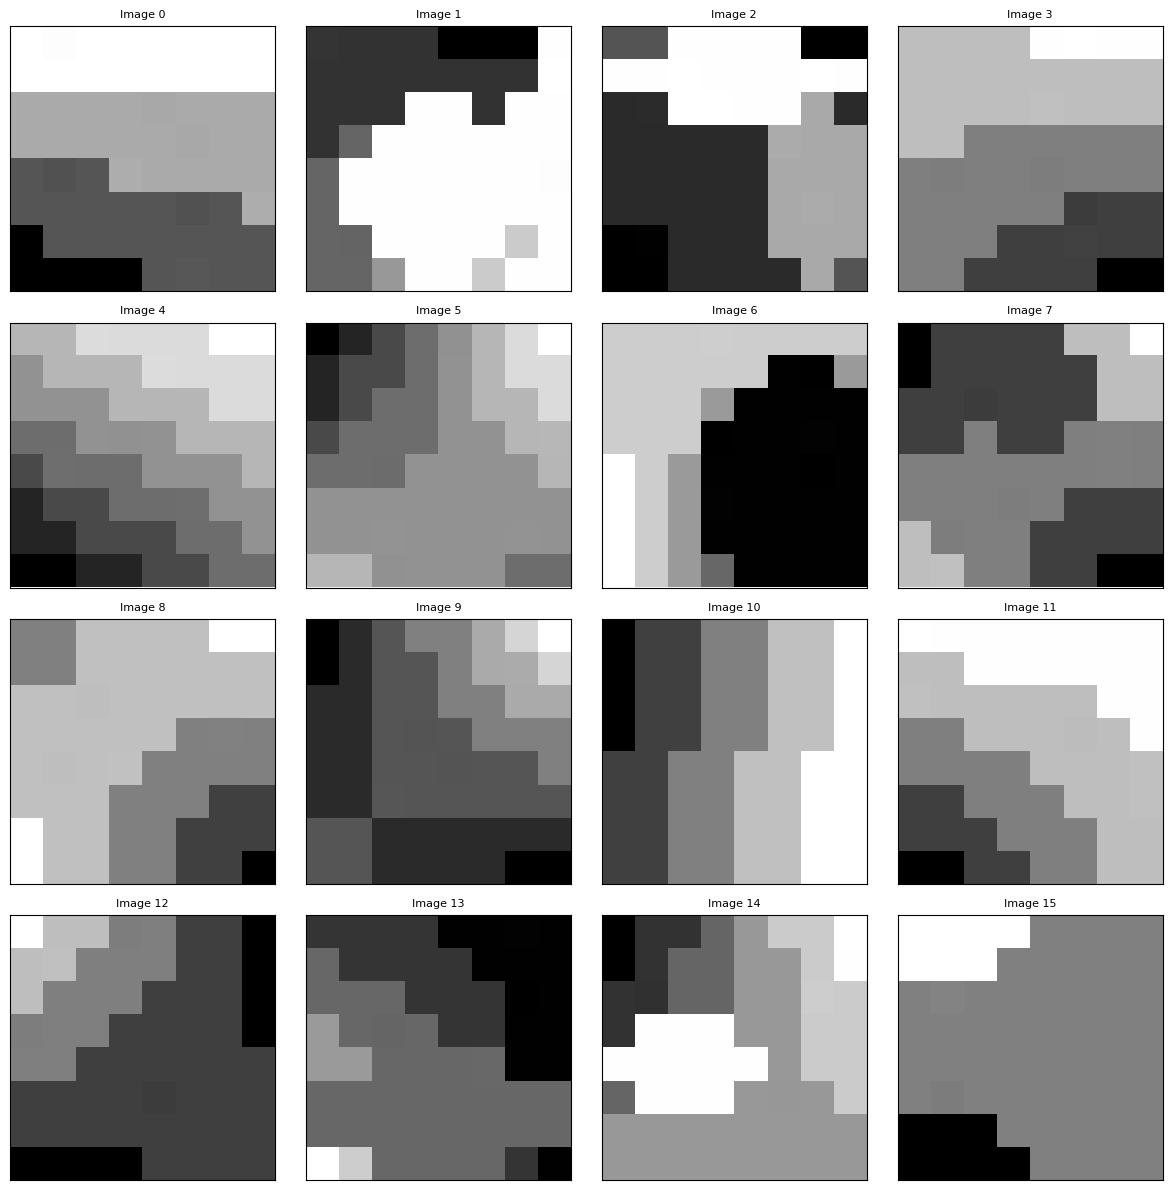


Displaying detailed view of image 0...


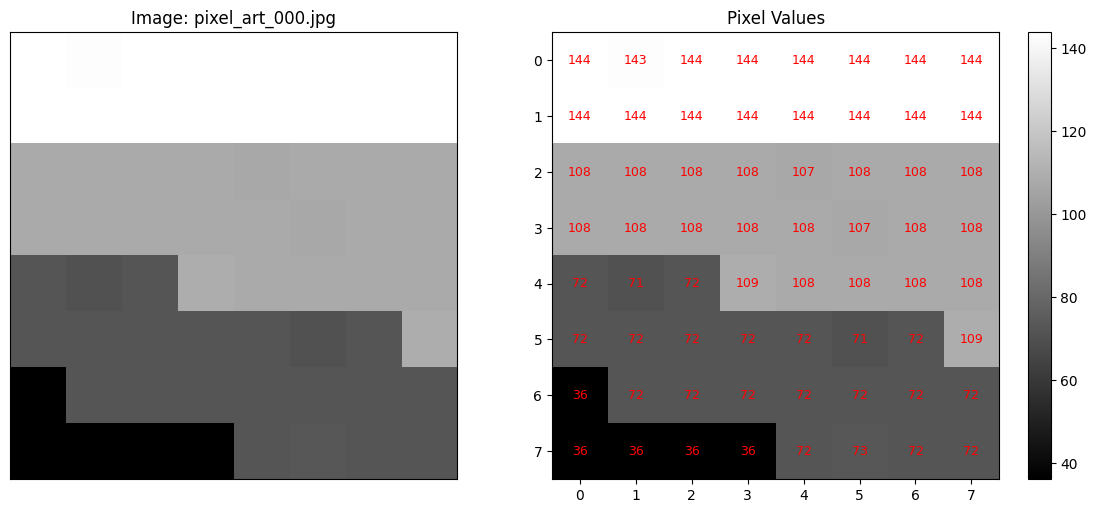

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.gridspec import GridSpec

def display_pixel_art_grid(directory, num_images=16, figsize=(12, 12)):
    """
    Display a grid of pixel art images from the given directory.

    Args:
        directory: Path to the directory containing the images
        num_images: Number of images to display (default: 16)
        figsize: Figure size (width, height) in inches
    """
    # Get list of image files
    image_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]
    image_files.sort()

    # Limit to requested number of images
    if len(image_files) > num_images:
        image_files = image_files[:num_images]

    # Calculate grid dimensions
    grid_size = int(np.ceil(np.sqrt(num_images)))

    # Create figure and grid
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(grid_size, grid_size, figure=fig)

    # Load and display each image
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(directory, img_file)
        img = np.array(Image.open(img_path))

        row = i // grid_size
        col = i % grid_size

        ax = fig.add_subplot(gs[row, col])
        ax.imshow(img, cmap='gray', interpolation='nearest')
        ax.set_title(f"Image {i}", fontsize=8)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.tight_layout()
    plt.show()

def display_single_image_details(directory, image_index=0):
    """
    Display a single image with pixel values.

    Args:
        directory: Path to the directory containing the images
        image_index: Index of the image to display (default: 0)
    """
    # Get list of image files
    image_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]
    image_files.sort()

    if image_index >= len(image_files):
        print(f"Error: Image index {image_index} out of range. Only {len(image_files)} images available.")
        return

    # Load the image
    img_path = os.path.join(directory, image_files[image_index])
    img = np.array(Image.open(img_path))

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Display the image
    ax1.imshow(img, cmap='gray', interpolation='nearest')
    ax1.set_title(f"Image: {image_files[image_index]}")
    ax1.set_xticks([])
    ax1.set_yticks([])

    # Display the pixel values
    im = ax2.imshow(img, cmap='gray', interpolation='nearest')
    ax2.set_title("Pixel Values")

    # Add pixel coordinates and values
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            text = ax2.text(x, y, img[y, x],
                           ha="center", va="center", color="r", fontsize=9)

    plt.colorbar(im, ax=ax2)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Path to the dataset directory
    dataset_dir = "pixel_art_dataset"

    # Check if directory exists
    if not os.path.exists(dataset_dir):
        print(f"Error: Directory '{dataset_dir}' not found.")
        exit(1)

    # Display a grid of images
    print("Displaying grid of 16 images...")
    display_pixel_art_grid(dataset_dir)

    # Display details of a single image
    print("\nDisplaying detailed view of image 0...")
    display_single_image_details(dataset_dir, image_index=0)

    # You can uncomment the following lines to view different images:
    # for i in range(5):
    #     display_single_image_details(dataset_dir, image_index=i)

Sure, I'll explain the key parameters you can adjust for both the background gradients and the ellipses in the image generation code:

### Background Gradient Parameters

1. **GRAYSCALE_LEVELS** (line 10):
   - Currently set to 8
   - Controls how many distinct gray values are used in the images
   - Decreasing this value (e.g., to 4) will create more "posterized" images with harsher transitions
   - Increasing it will create smoother gradients with more subtle variations

2. In the `create_smooth_gradient_background` function:
   - `corners = np.random.randint(0, GRAYSCALE_LEVELS, size=4)`:
     - This randomly chooses grayscale values for the four corners of the image
     - You could modify this to bias toward darker or lighter gradients by changing the range

3. The bilinear interpolation used for gradients:
   - The gradient is created by interpolating between the four corner values
   - You could modify this to create different gradient patterns (radial, angular, etc.) by changing the interpolation method

### Ellipse Parameters

1. In the `add_ellipse` function:
   - **Frequency of ellipses**:
     - `if random.random() < 0.5:` (line 70)
     - Currently there's a 50% chance that an image will have ellipses
     - Change 0.5 to a lower value (e.g., 0.3) for fewer ellipses or higher (e.g., 0.8) for more

2. **Number of ellipses**:
   - `num_ellipses = random.randint(1, 3)` (line 72)
   - Currently each image with ellipses has 1-3 ellipses
   - You can change these bounds to allow more or fewer ellipses per image

3. **Ellipse size ranges**:
   - `width = random.randint(2, size-1)` and `height = random.randint(2, size-1)` (lines 88-89)
   - These control the minimum and maximum dimensions of ellipses
   - Increasing the minimum (e.g., from 2 to 4) will create larger ellipses
   - Decreasing the maximum will create smaller ellipses

4. **Ellipse positioning**:
   - `x0 = random.randint(0, size - width)` and `y0 = random.randint(0, size - height)` (lines 90-91)
   - These determine where ellipses are placed
   - You could modify this to bias placement toward certain regions of the image

5. **Ellipse fill value**:
   - `fill_value = random.randint(0, GRAYSCALE_LEVELS-1) * (255 // (GRAYSCALE_LEVELS - 1))` (line 95)
   - This randomly chooses one of the grayscale levels for the ellipse fill
   - You could modify this to bias toward darker or lighter ellipses

If you wanted to create more distinctive ellipses, you could also add an outline by modifying the `draw.ellipse` call to include an outline parameter with a different grayscale value than the fill.

Would you like me to suggest any specific modifications to these parameters or explain any other aspects of the code?